# Data exploration and visualizations.  
Pablo Osorio, Juliana Vallejo, Camila Vásquez.

[kaggle competition](https://www.kaggle.com/c/ieee-fraud-detection/overview)  
### Data description
[Data in kaggle competition](https://www.kaggle.com/c/ieee-fraud-detection/data)  
[Data Description (Details and Discussion)](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)

### Important notebooks
[kaggle notebook motivation](https://www.kaggle.com/artgor/eda-and-models/data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data read

Since train identity table is considerably shorter than train transaction table, and merging them will result in a incredibly high ratio of NANs then we have decided to just use transaction table.

In [2]:
folder_path = '../input/'

# Train
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv', nrows=25000)
X_train, y_train = train_transaction.drop('isFraud', axis=1), train_transaction['isFraud']

# Test
# test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
# test_transaction = pd.read_csv(f'a{folder_path}test_transaction.csv')
# sub = pd.read_csv(f'{folder_path}sample_submission.csv')
# train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [3]:
print(f'''
train identity shape:  {train_identity.shape},
train_transaction shape: {train_transaction.shape}
merged tables: {train.shape}''')


train identity shape:  (7000, 41),
train_transaction shape: (25000, 394)
merged tables: (25000, 434)


In [4]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [15]:
train_identity.dropna(axis=1).shape

(7000, 3)

In [8]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
train_transaction.dropna(axis=1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,...,V282,V283,V288,V289,V296,V300,V301,V313,V314,V315
0,2987000,0,86400,68.50,W,13926,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.00,W,2755,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.00,W,4663,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.00,W,18132,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2987004,0,86506,50.00,H,4497,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3011995,0,653676,57.95,W,8406,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,3011996,0,653687,50.00,H,17637,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,3011997,0,653691,311.95,W,1724,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,3011998,0,653699,50.00,W,12570,2.0,1.0,0.0,0.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,78.0,323.0,78.0


In [9]:
del train_identity, train_transaction

In [10]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 359 columns in train dataset with missing values.


## Data Exploration
Let's start with identity information. id_01 - id_11 are continuous variables, id_12 - id_38 are categorical and the last two columns are obviously also categorical.  


*id_01* is continuous? I can count the values with this function and it looks discrete despite being float.
[Data Description (Details and Discussion)](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203) by Vesta (experts in theme) say that it is continuous.

In [5]:
continuous_variables = [f'id_{i:02d}' for i in range(1, 12)] # Fill the zero before
categorical_variables = [f'id_{i:02d}' for i in range(12, 39)]
categorical_variables.append('DeviceType')
categorical_variables.append('DeviceInfo')

In [7]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
train['isFraud'].value_counts()/ train['isFraud'].count() 

0    0.97164
1    0.02836
Name: isFraud, dtype: float64

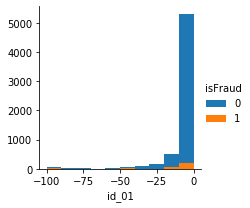

In [23]:
g2 = sns.FacetGrid(train, hue='isFraud')
g2.map(plt.hist, "id_01")
g2.add_legend();

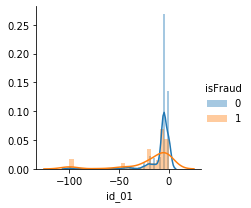

In [31]:
g2 = sns.FacetGrid(train, hue='isFraud')
g2.map(sns.distplot, "id_01", rug=False)
g2.add_legend();

In [34]:
train_ids_cont = train[['isFraud',*continuous_variables]]

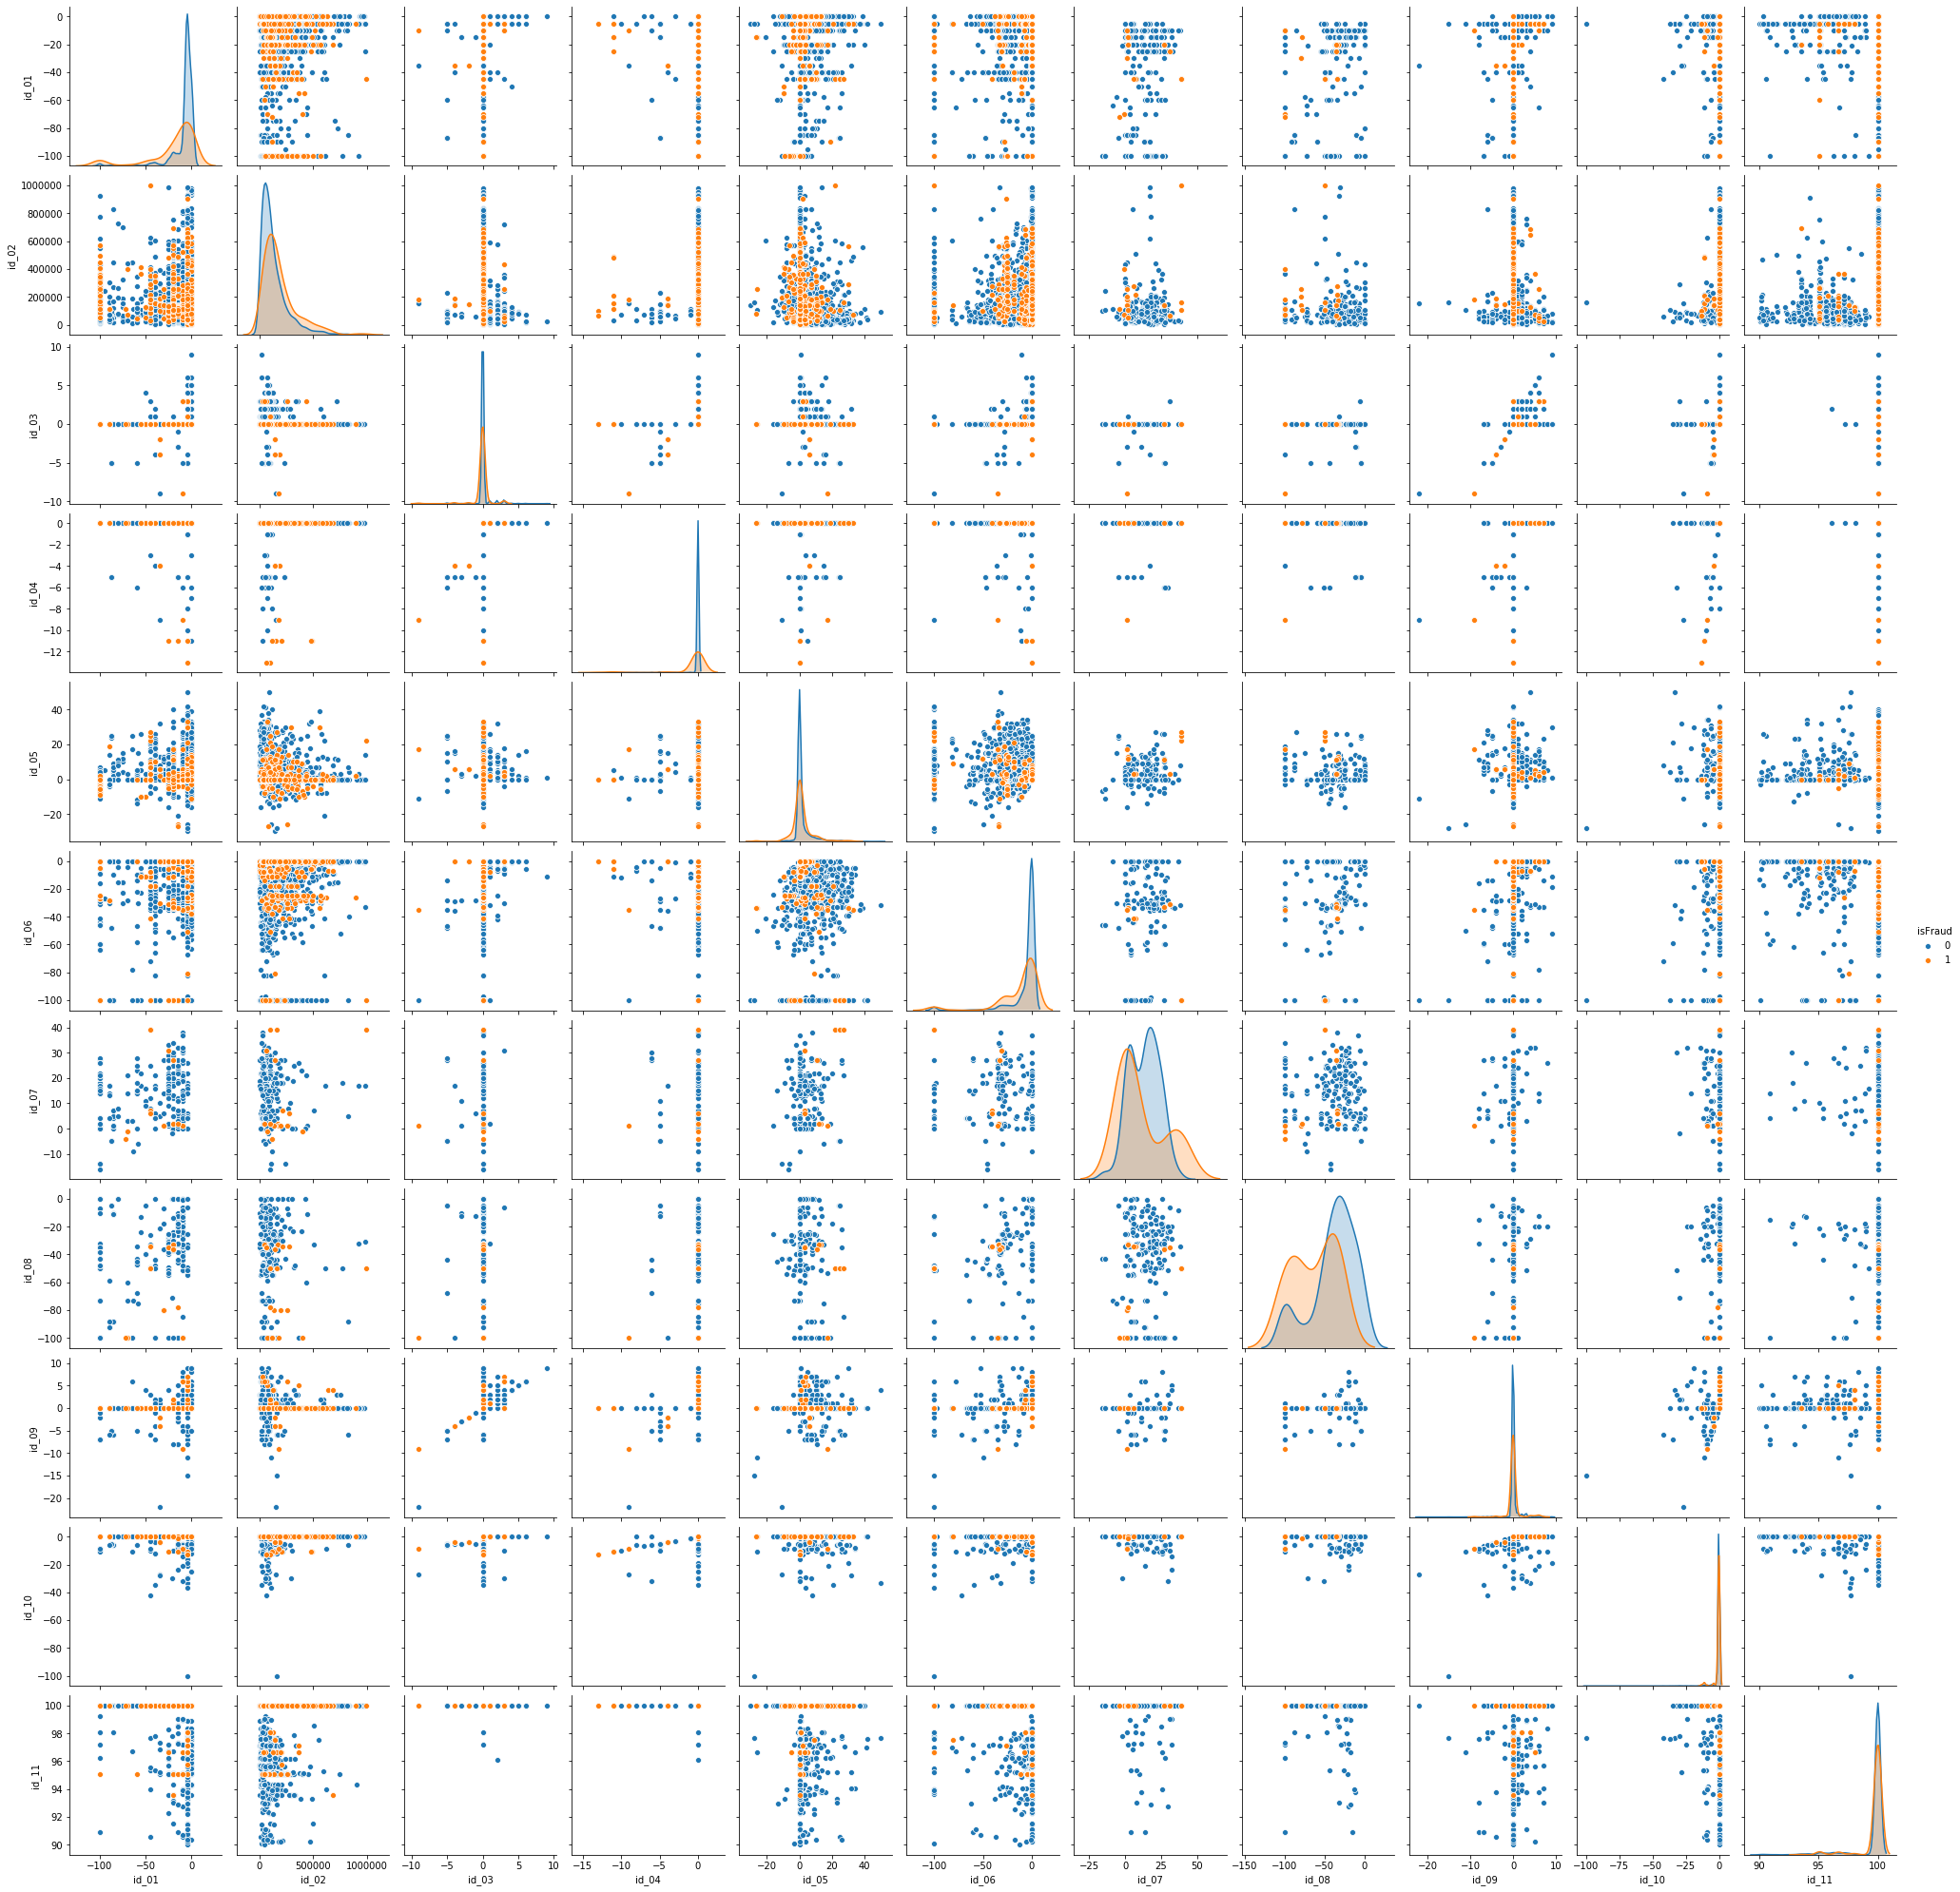

In [38]:
g = sns.pairplot(train_ids_cont, hue="isFraud",diag_kind="kde", height=2.5)

### IDEAS

- Look for relationship between TransactionDT and isFaul
- Train and test transaction dates do not overlap. So it would be prudent to use time-based split for validation. This was already noted in abother kernel: [Kaggle notebook](https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda)
*I dont understand this*

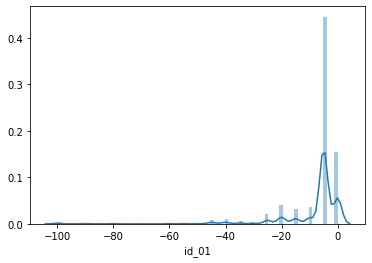

In [63]:
sns.distplot(train['id_01'], bins=77, kde = True) # Why 77?, because real training set has 77

In [23]:
len(train.columns)

434

In [12]:
f'Baseline for NAN counted values should be {(250000-70000)/ 250000}. Any of the features presented in _train_identy should not be less than that'

'Baseline for NAN counted values should be 0.72. Any of the features presented in _train_identy should not be less than that'

In [13]:
print( train['id_01'].value_counts(dropna=False, normalize=True).head())

 NaN     0.720000
-5.0     0.161940
 0.0     0.055952
-20.0    0.014452
-10.0    0.013048
Name: id_01, dtype: float64


In [14]:
print( train['id_03'].value_counts(dropna=False, normalize=True).head())
f'id_03 has 88% of missing values and 98% of values are either missing or equal to 0.'

NaN    0.877980
0.0    0.116932
1.0    0.001856
3.0    0.001504
2.0    0.000956
Name: id_03, dtype: float64


'id_03 has 88% of missing values and 98% of values are either missing or equal to 0.'

In [15]:
train['id_11'].value_counts(dropna=False, normalize=True).head()

NaN           0.726372
100.000000    0.256292
95.080002     0.002040
95.160004     0.001324
97.120003     0.001128
Name: id_11, dtype: float64

22% of values in id_11 are equal to 100and 76% are missing. Quite strange.

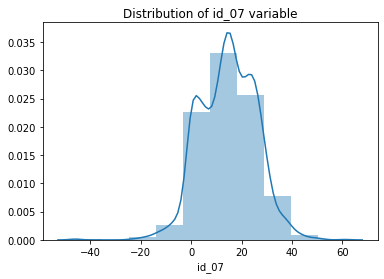

In [16]:
sns.distplot(train['id_07'], bins=10);
plt.title('Distribution of id_07 variable');

In [19]:
feature_count = pd.Series(train['id_31'].value_counts(dropna=False)[:40])
feature_count

NaN                        181796
chrome 63.0                 16637
mobile safari 11.0          10298
chrome 62.0                  6978
safari generic               5283
ie 11.0 for desktop          5216
chrome 63.0 for android      4397
firefox 57.0                 3040
mobile safari 10.0           2486
chrome 62.0 for android      1843
mobile safari generic        1575
edge 15.0                    1352
edge 16.0                    1351
chrome generic                827
samsung browser 6.2           717
chrome 61.0                   540
mobile safari 9.0             475
chrome 49.0                   425
ie 11.0 for tablet            387
chrome 61.0 for android       379
firefox                       354
edge 14.0                     305
chrome 60.0                   274
firefox 52.0                  222
chrome 60.0 for android       207
chrome                        194
chrome 63.0 for ios           185
other                         139
opera 49.0                    132
chrome 59.0 fo

In [50]:
train.groupby(['card1'])['D15'].transform('mean')

In [48]:
train['D15'] / train.groupby(['card1'])['D15'].transform('mean')

0             NaN
1        0.000000
2        3.336049
3        0.572720
4             NaN
           ...   
24995    1.601721
24996         NaN
24997    3.339335
24998    0.377168
24999    0.000000
Name: D15, Length: 25000, dtype: float64

In [18]:
# sns.countplot(x="id_31", data=train)